<a href="https://colab.research.google.com/github/yasarsultan/AIML/blob/main/AIML_Module_1_Lab_2_Machine_learning_terms_and_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 2
# Machine learning terms and metrics


 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district.

Let us download and examine the dataset.

In [3]:
 dataset =  datasets.fetch_california_housing()
 print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<ipython-input-3-d89ecb46a347>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int) # so that we can classify


Here is a function for calculating the 1-nearest neighbours

In [4]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

We will also define a 'random classifier', which randomly allots labels to each sample

In [5]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [6]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [7]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [8]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [9]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
print(len(trainlabel), len(vallabel))

12368 4128


What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.16658665386461835


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1690891472868217



Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier.

Now let us try another random split and check the validation accuracy

In [59]:
nums = [0.1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99.9]
vals_nn = []
for i in nums:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of nearest neighbour is ", valAccuracy, i)
  vals_nn.append(valAccuracy)
print(vals_nn)

Validation accuracy of nearest neighbour is  0.2777103314313464 0.1
Validation accuracy of nearest neighbour is  0.28971209985906987 10
Validation accuracy of nearest neighbour is  0.3105486511063959 20
Validation accuracy of nearest neighbour is  0.3226566591028103 30
Validation accuracy of nearest neighbour is  0.3181169757489301 40
Validation accuracy of nearest neighbour is  0.331451018904984 50
Validation accuracy of nearest neighbour is  0.3326312622235595 60
Validation accuracy of nearest neighbour is  0.3429551877270892 70
Validation accuracy of nearest neighbour is  0.34384384384384387 80
Validation accuracy of nearest neighbour is  0.34963325183374083 90
Validation accuracy of nearest neighbour is  0.4375 99.9
[0.2777103314313464, 0.28971209985906987, 0.3105486511063959, 0.3226566591028103, 0.3181169757489301, 0.331451018904984, 0.3326312622235595, 0.3429551877270892, 0.34384384384384387, 0.34963325183374083, 0.4375]


In [62]:
vals_rc = []
for i in nums:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of Random Classifier is ", valAccuracy, i)
  vals_rc.append(valAccuracy)
print(vals_rc)

Validation accuracy of Random Classifier is  0.17696322369219566 0.1
Validation accuracy of Random Classifier is  0.16137512639029322 10
Validation accuracy of Random Classifier is  0.17041751913313632 20
Validation accuracy of Random Classifier is  0.16796635415753966 30
Validation accuracy of Random Classifier is  0.1669396110542477 40
Validation accuracy of Random Classifier is  0.1621258399511301 50
Validation accuracy of Random Classifier is  0.16636582430806257 60
Validation accuracy of Random Classifier is  0.17204301075268819 70
Validation accuracy of Random Classifier is  0.16905801621958827 80
Validation accuracy of Random Classifier is  0.15464547677261614 90
Validation accuracy of Random Classifier is  0.20833333333333334 99.9
[0.17696322369219566, 0.16137512639029322, 0.17041751913313632, 0.16796635415753966, 0.1669396110542477, 0.1621258399511301, 0.16636582430806257, 0.17204301075268819, 0.16905801621958827, 0.15464547677261614, 0.20833333333333334]


You can run the above cell multiple times to try with different random splits.
We notice that the accuracy is different for each run, but close together.

Now let us compare it with the accuracy we get on the test dataset.

In [13]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced?

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

1. The accuracy of validation set does not affect much however if the accuracy is too high like 99.9%, then the model may underfit the training data and may have a high bias. The same goes with reducing the percentage until it becomes too low like 0.1%, then the model may overfit the training data and have a high variance.

2. The size of the training and validation sets significantly influences the ability to predict the accuracy on the test set as described above.

3. The good percentage depends on the size and quality of the data set. However, it more common to use 10-30% of data set as validation set and the rest as training set. Another approach would be to use k-fold cross validation.

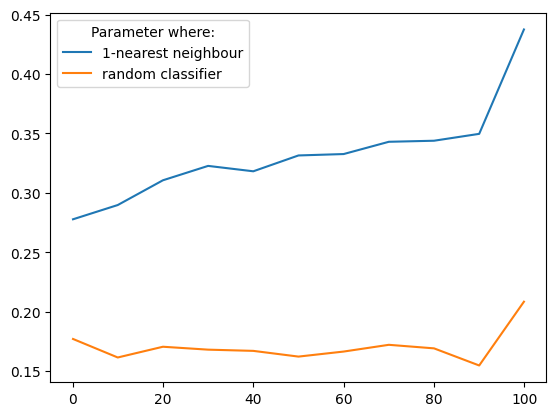

In [63]:

plt.plot(nums, vals_nn, label="1-nearest neighbour")
plt.plot(nums, vals_rc, label="random classifier")
plt.legend(title='Parameter where:')
plt.show()

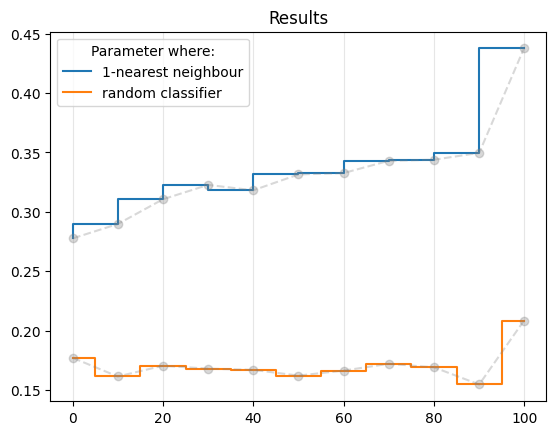

In [64]:

plt.step(nums, vals_nn, label='1-nearest neighbour')
plt.plot(nums, vals_nn, 'o--', color='grey', alpha=0.3)

plt.step(nums, vals_rc, where='mid', label='random classifier')
plt.plot(nums, vals_rc, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.9')
plt.legend(title='Parameter where:')
plt.title('Results')
plt.show()

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute.

In [65]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [66]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33798145083241643
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


Answers

1. Yes

2. Yes, in many cases it depends on how well the validation set represents the test set.

3. Increasing no.of iterations can potentially improve the model performance.

4. No